In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [60]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df

,customer_id,PC0,PC1,PC2,PC3,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.217874,0.117311,0.996435,0.701242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.217496,0.084169,0.984862,0.481741,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.288791,0.117914,0.963107,0.578963,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.207263,0.191011,0.975004,0.491287,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.207204,0.180383,0.970018,0.402953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30549,f4e366c281,0.002547,0.664124,0.857308,0.534939,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
30550,f6b6709018,0.002348,0.675985,0.861862,0.618274,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30551,f74ad8ce3f,0.001434,0.632577,0.845303,0.310686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
30552,f7b19c0241,0.001282,0.655910,0.854227,0.480297,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
df.set_index('customer_id',inplace=True)

In [4]:
metric_features=df.columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30554 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PC0                           30554 non-null  float64
 1   PC1                           30554 non-null  float64
 2   PC2                           30554 non-null  float64
 3   PC3                           30554 non-null  float64
 4   customer_region_2440          30554 non-null  float64
 5   customer_region_2490          30554 non-null  float64
 6   customer_region_4140          30554 non-null  float64
 7   customer_region_4660          30554 non-null  float64
 8   customer_region_8370          30554 non-null  float64
 9   customer_region_8550          30554 non-null  float64
 10  customer_region_8670          30554 non-null  float64
 11  customer_region_Unknown       30554 non-null  float64
 12  last_promo_DISCOUNT           30554 non-null  float

In [50]:
cluster_range = range(5, 16)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []
davies_bouldin_scores = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df, cluster_labels)
    avg_silhouette.append(silhouette_avg)

    # Compute and store Davies-Bouldin Score
    db_score = davies_bouldin_score(df, cluster_labels)
    davies_bouldin_scores.append(db_score)


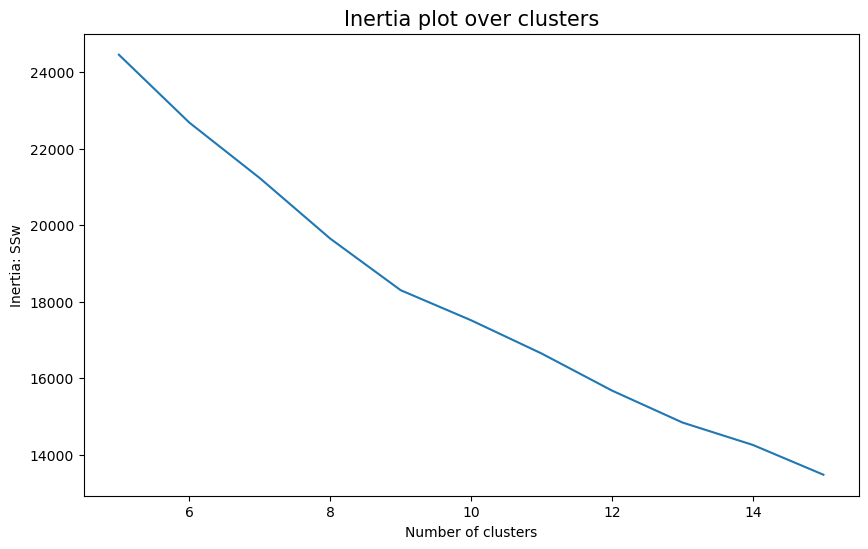

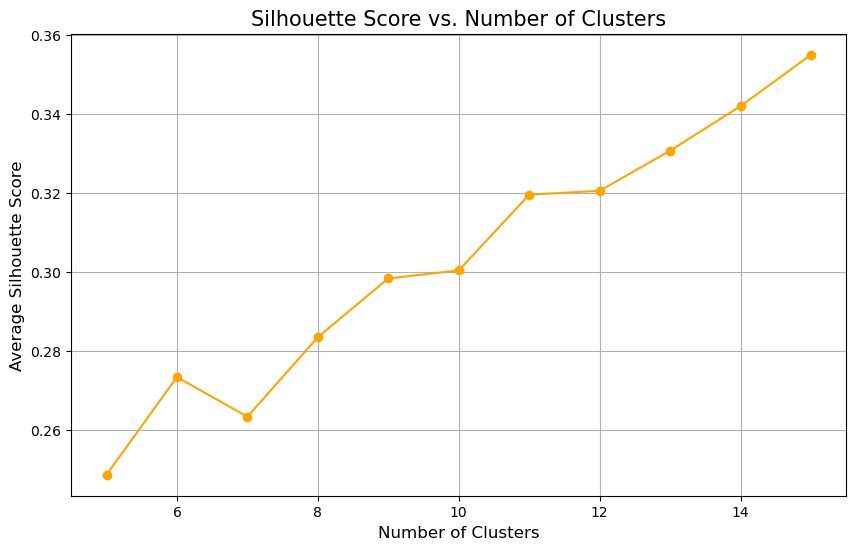

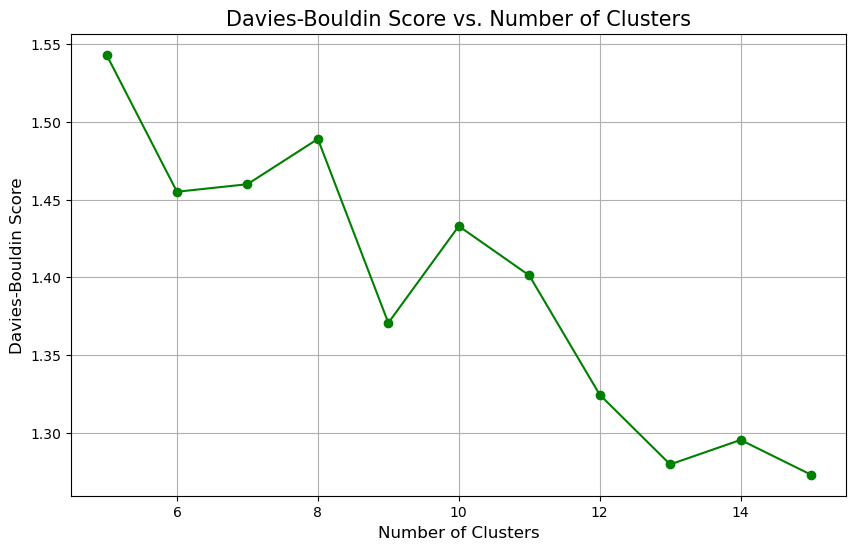

In [7]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='green')
plt.title("Davies-Bouldin Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Davies-Bouldin Score", size=12)
plt.grid(True)
plt.show()

In [62]:
print(df.info())
print(df.isna().sum())
df_numeric = df.select_dtypes(include=[np.number])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30554 entries, 0 to 30553
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   30554 non-null  object 
 1   PC0                           30554 non-null  float64
 2   PC1                           30554 non-null  float64
 3   PC2                           30554 non-null  float64
 4   PC3                           30554 non-null  float64
 5   customer_region_2440          30554 non-null  float64
 6   customer_region_2490          30554 non-null  float64
 7   customer_region_4140          30554 non-null  float64
 8   customer_region_4660          30554 non-null  float64
 9   customer_region_8370          30554 non-null  float64
 10  customer_region_8550          30554 non-null  float64
 11  customer_region_8670          30554 non-null  float64
 12  customer_region_Unknown       30554 non-null  float64
 13  l

8 clusters appear to balance most metrics (silhouette score, inertia, and Davies-Bouldin index)

In [64]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(df_numeric)


In [68]:
kmeans_concat = pd.concat((df_numeric, pd.Series(kmeans_labels, name='labels')), axis=1)
kmeans_concat.groupby('labels').mean()

,PC0,PC1,PC2,PC3,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
labels,,,,,,,,,,,,,,,,,
0,0.380167,0.433507,0.454411,0.564333,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.847416,0.000000,0.146939
1,0.326995,0.364265,0.461427,0.400511,0.033038,0.010029,0.015929,0.000000,0.010619,0.000590,0.711799,0.012979,0.000000,0.721534,0.000000,0.079646,0.084956
2,0.369963,0.393581,0.469702,0.468258,0.080454,0.024698,0.053530,0.000000,0.027136,0.000742,0.315349,0.021412,0.000000,0.000000,0.851813,0.000000,0.117554
3,0.262919,0.346538,0.471809,0.360135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.187685,0.000000,0.463650,1.000000,0.000000
4,0.261287,0.358943,0.459711,0.408125,0.026010,0.007896,0.015792,0.000000,0.016256,0.000464,0.771482,0.013005,0.130051,0.000000,0.385509,0.000000,1.000000
5,0.319899,0.405786,0.471425,0.514297,0.063094,0.018743,0.027719,0.336853,0.013992,0.000000,0.171331,0.016631,1.000000,0.000000,0.000000,0.167371,0.154699
6,0.281223,0.405296,0.479143,0.552638,0.074124,0.020367,0.040067,0.356260,0.023372,0.000334,0.000000,0.019032,0.000000,0.095159,0.569282,1.000000,0.000000
7,0.322050,0.422108,0.457858,0.550717,0.029826,0.003939,0.006753,0.803602,0.010692,0.000563,0.000000,0.007316,0.000000,0.811480,0.000000,0.102983,0.503095


In [78]:
silhouette = silhouette_score(df_numeric, kmeans_labels)
print("Silhouette Score:", silhouette)

db_index = davies_bouldin_score(df_numeric, kmeans_labels)

print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.24366529086179164
Davies-Bouldin Index: 1.4435755524268659


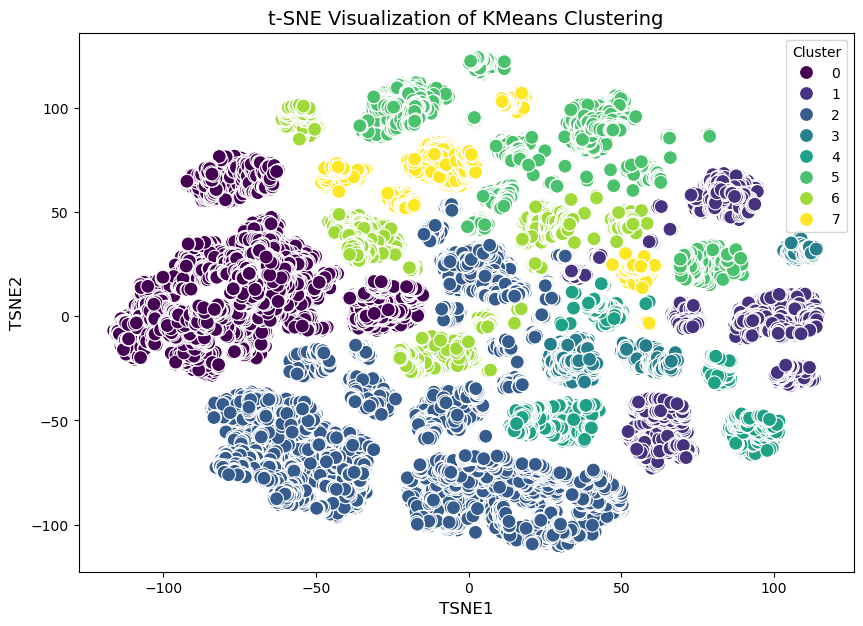

In [76]:
df_numeric = df.select_dtypes(include=[np.number])

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_numeric)

# Criar um DataFrame para visualização (diferente do original)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = kmeans_labels  # Adicionar rótulos de cluster

# Plot t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette='viridis',
    data=df_tsne,
    s=100,
    marker='o',
    legend='full'
)
plt.title("t-SNE Visualization of KMeans Clustering", fontsize=14)
plt.xlabel("TSNE1", fontsize=12)
plt.ylabel("TSNE2", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.show()

In [11]:
df_clean=pd.read_csv('df_Clean.csv',delimiter=',')

In [12]:
cuisines = [col for col in df_clean.columns if col.startswith("CUI_")]
df_clean['cluster'] = kmeans_labels
cluster_summary = df_clean.groupby('cluster')[cuisines].mean()


In [13]:
cluster_cuisine_spending = cluster_summary[cuisines]

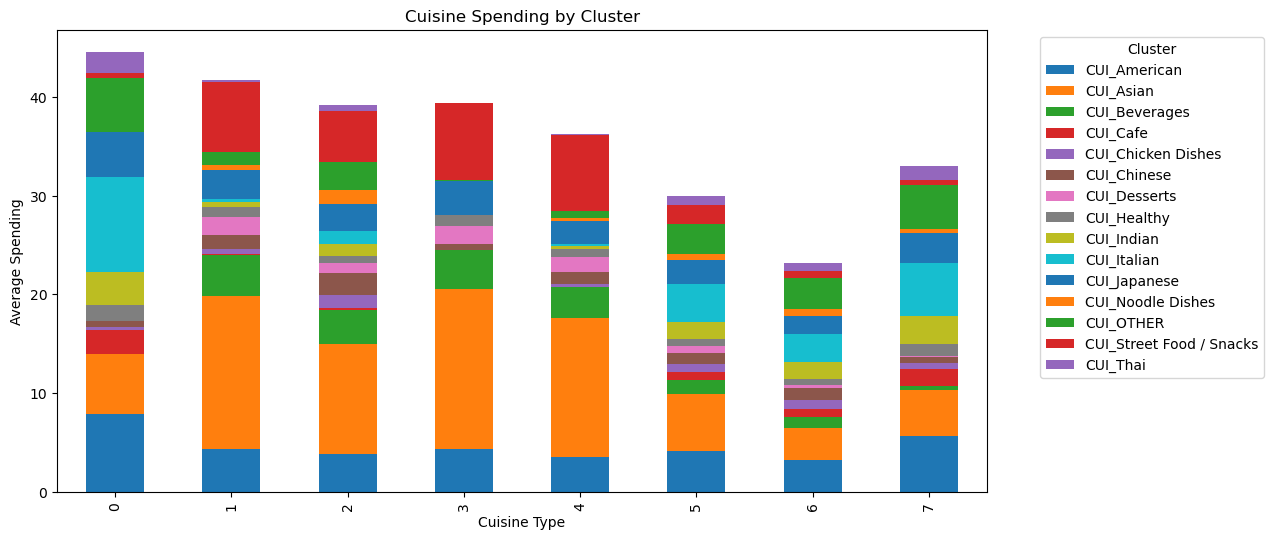

In [14]:
cluster_cuisine_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
df_clean.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'Total_Spent', 'order_count', 'Diversity_Cuisine', 'costumer_time',
       'Intensity_of_Activity', 'Customer_loyalty', 'product_intensity',
       'Day_Week_Spread', 'week_highest', 'hour_spread', 'hour_highest',
       'cluster'],
      dtype='object')

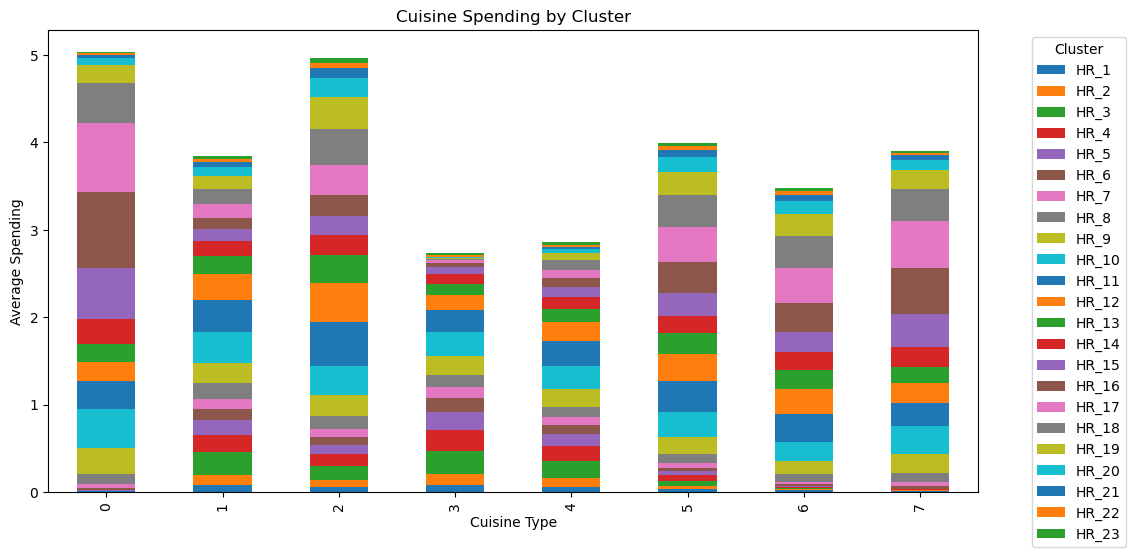

In [16]:
hours=[col for col in df_clean.columns if col.startswith("HR_")]
hours_summary = df_clean.groupby('cluster')[hours].mean()
cluster_hour_spending = hours_summary[hours]
cluster_hour_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

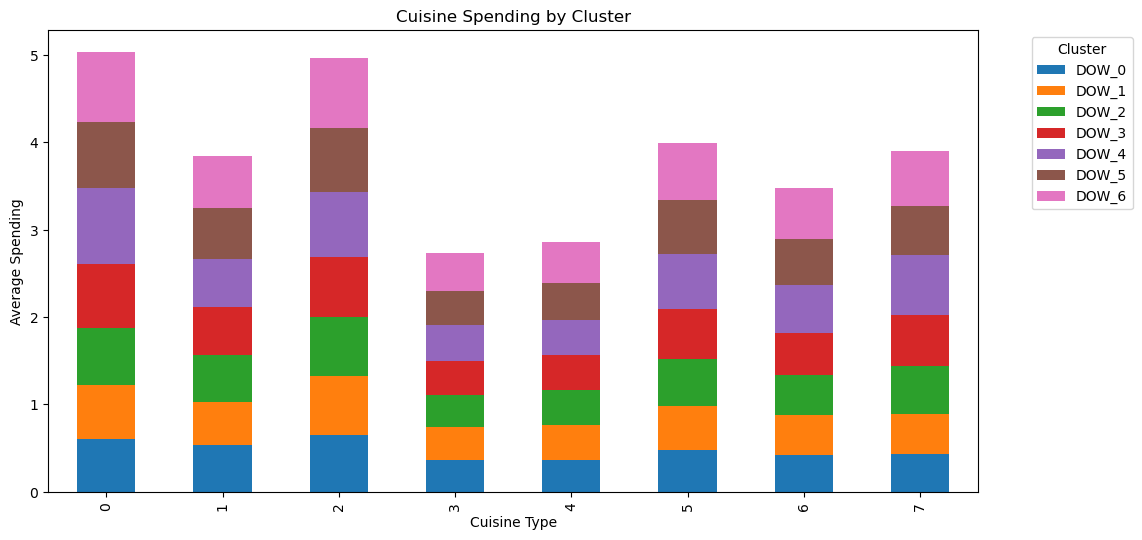

In [17]:
days_week=[col for col in df_clean.columns if col.startswith("DOW_")]
week_summary = df_clean.groupby('cluster')[days_week].mean()
cluster_week_spending = week_summary[days_week]
cluster_week_spending.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Cuisine Spending by Cluster')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Spending')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
def evaluate_clustering_kmeans(model, data):
    """
    Avalia a qualidade do clustering usando KMeans.
    
    Args:
        model: Modelo KMeans ajustado.
        data: Dados usados no clustering.
    
    Returns:
        dict: Contendo Silhouette Score e SSE.
    """
    # Labels dos clusters e centróides
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    
    # Cálculo do índice de silhueta
    silhouette = silhouette_score(data, labels)
    
    # Cálculo da soma dos erros quadráticos (SSE)
    sse = np.sum((data - cluster_centers[labels])**2)
    
    return {
        "Silhouette Score": silhouette,
        "SSE": sse
    }

# Exemplo de como usar com `kmeans` e `df`:
# results = evaluate_clustering_kmeans(kmeans, df)
# results

In [36]:
results = evaluate_clustering_kmeans(kmeans, df)
print("Silhouette Score:", results["Silhouette Score"])
print("SSE:", results["SSE"])

ValueError: Unable to coerce to DataFrame, shape must be (30554, 3): given (30554, 17)